In [12]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import random
import numpy as np
import tensorflow as tf

In [13]:
# Establecer una semilla para reproducibilidad
seed_value = 42
random.seed(seed_value)        # Semilla para Python
np.random.seed(seed_value)     # Semilla para NumPy
tf.random.set_seed(seed_value) # Semilla para TensorFlow/Keras

# A partir de aquí, puedes continuar con la construcción y entrenamiento de tu modelo de Keras

In [14]:
def generatePlot(history):
    # Extracción de datos
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Creación del gráfico de accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training')
    plt.plot(epochs, val_acc, 'r', label='Validation')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Creación del gráfico de loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training')
    plt.plot(epochs, val_loss, 'r', label='Validation')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

### Carga de las muestras de los animales

In [15]:
from keras.preprocessing.image import ImageDataGenerator
import os

image_size = 150
batch_size = 16
rescale_factor = 1./255

# Directorio conjunto entrenamiento
data_dir='dataset/Data/train'


# Crear un generador para aumentar datos
train_datagen = ImageDataGenerator(
    rescale=rescale_factor,    # Normalizar los valores de los píxeles
    shear_range=0.2,   # Rango para las transformaciones aleatorias
    zoom_range=0.2,    # Rango para el zoom aleatorio
    horizontal_flip=True, # Activar el giro horizontal aleatorio
    validation_split=0.2) # Establecer el porcentaje de imágenes para el conjunto de validación

# Cargar imágenes de entrenamiento
train_generator = train_datagen.flow_from_directory(
    data_dir,      # Directorio con datos
    target_size=(image_size, image_size), # Cambiar el tamaño de las imágenes a 50x50
    batch_size=batch_size,
    class_mode='categorical', # 'binary' para clasificación binaria, 'categorical' para multiclase
    subset='training') # Seleccionar solo el conjunto de entrenamiento

# Cargar imágenes de validación
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # Seleccionar solo el conjunto de validación

Found 4116 images belonging to 3 classes.
Found 1028 images belonging to 3 classes.


In [16]:
model = Sequential()
# Capas convolucionales
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(image_size, image_size, 3))) # 3 canales de color
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))  # Dropout después de la capa de conv2D

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_size, image_size, 3))) # 3 canales de color
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))  # Dropout después de la capa de conv2D

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(image_size, image_size, 3))) # 3 canales de color
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))  # Dropout después de la capa de conv2D

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(image_size, image_size, 3))) # 3 canales de color
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))  # Dropout después de la capa de conv2D

model.add(Flatten()) # Aplanar la salida de la capa convolucional
# Capas fully connected (clasificador)
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout antes de la capa de salida
model.add(Dense(3, activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 74, 74, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 36, 36, 32)       

In [17]:
from keras.callbacks import EarlyStopping

# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)  # 'patience' es el número de épocas sin mejora después de las cuales el entrenamiento se detendrá

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 100

# Entrenar el modelo con Early Stopping
history_of_train = model.fit_generator(
        train_generator,
        epochs=epochs,
        validation_data = validation_generator,
        callbacks = [early_stopping],
        steps_per_epoch=200
)

/tmp/ipykernel_64587/166245469.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_of_train = model.fit_generator(


Epoch 1/100


2023-12-19 23:07:44.601527: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


200/200 [==============================] - 50s 236ms/step - loss: 0.6886 - accuracy: 0.7206 - val_loss: 0.5043 - val_accuracy: 0.7967
Epoch 2/100
200/200 [==============================] - 47s 234ms/step - loss: 0.4650 - accuracy: 0.8069 - val_loss: 0.4347 - val_accuracy: 0.8317
Epoch 3/100
200/200 [==============================] - 46s 232ms/step - loss: 0.4188 - accuracy: 0.8309 - val_loss: 0.4373 - val_accuracy: 0.8473
Epoch 4/100
200/200 [==============================] - 46s 232ms/step - loss: 0.3706 - accuracy: 0.8482 - val_loss: 0.4716 - val_accuracy: 0.8171
Epoch 5/100
200/200 [==============================] - 46s 231ms/step - loss: 0.3738 - accuracy: 0.8538 - val_loss: 0.3675 - val_accuracy: 0.8531
Epoch 6/100
200/200 [==============================] - 46s 229ms/step - loss: 0.3458 - accuracy: 0.8686 - val_loss: 0.3825 - val_accuracy: 0.8735
Epoch 7/100
200/200 [==============================] - 45s 227ms/step - loss: 0.3166 - accuracy: 0.8767 - val_loss: 0.3646 - val_accurac

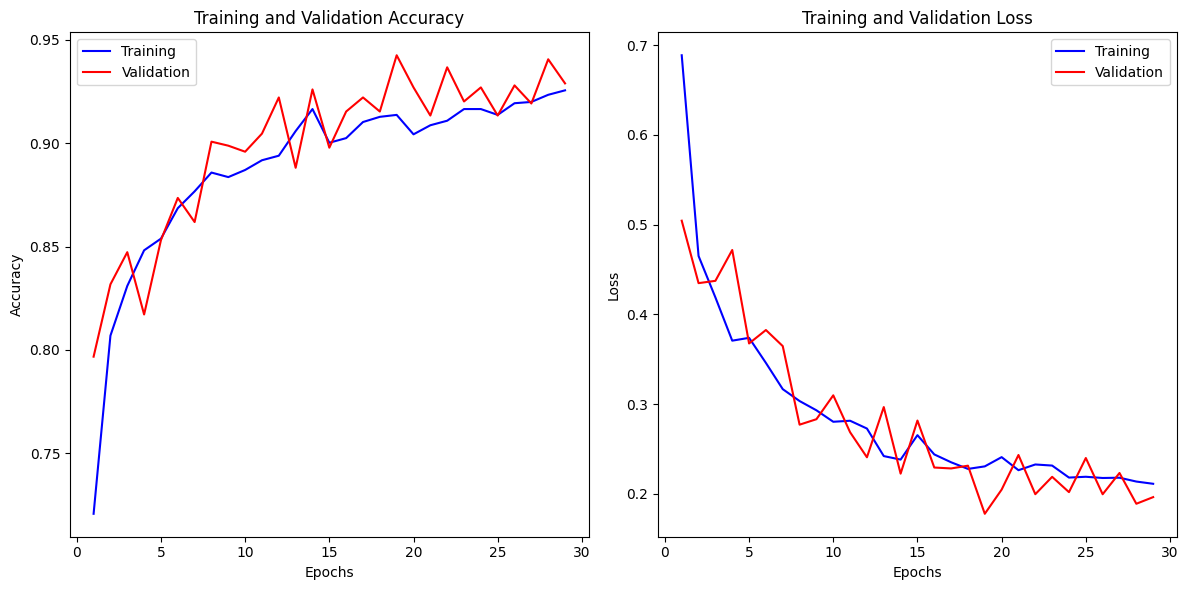

In [19]:
generatePlot(history_of_train)